In [918]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
from scipy import stats

1- DF inflacion

In [919]:
df_inflacion = pd.read_csv("ETL ADA\df_inflacion.csv")

In [920]:
df_inflacion

,country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Antigua y Barbuda,1.416053,5.333806,-0.550160,3.370025,3.456750,3.376880,1.059498,1.089442,0.968993,-0.489438,2.432488,1.207158,1.431356,0.625990,2.062996
1,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bahamas,2.492578,4.489560,2.062735,1.344027,3.198781,1.973368,0.722415,1.513756,1.861483,-0.346377,1.518207,2.265863,2.491235,0.038521,2.904913
3,Barbados,4.034230,8.108108,3.643862,5.824219,9.432202,4.533348,1.814104,1.769503,-1.112790,1.281928,4.660185,3.673814,4.100290,NaN,NaN
4,Belice,2.318083,6.394431,-1.104310,0.917977,1.602056,1.300581,0.509748,1.201400,-0.861584,0.663427,1.147653,0.269983,0.187069,0.121435,3.235637
5,Bolivia,8.705609,14.006811,3.346454,2.503276,9.884464,4.515603,5.736400,5.766601,4.059610,3.623214,2.822758,2.272060,1.839545,0.940742,0.737384
6,Brasil,3.641273,5.678594,4.888035,5.038727,6.636450,5.403499,6.204311,6.329040,9.029901,8.739144,3.446373,3.664850,3.732976,3.211768,8.301660
7,Canadá,2.138384,2.370271,0.299467,1.776872,2.912135,1.515678,0.938292,1.906636,1.125241,1.428760,1.596884,2.268226,1.949269,0.717000,3.395193
8,Chile,4.407799,8.716269,0.353045,1.410711,3.341217,3.007448,1.789556,4.718675,4.348774,3.786194,2.182718,2.434890,2.557545,3.045491,4.524568
9,Colombia,5.544385,6.996885,4.202517,2.272002,3.415033,3.169302,2.016992,2.898838,4.989831,7.513460,4.314313,3.240569,3.523019,2.526635,3.495058


In [921]:
df_inflacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  33 non-null     object 
 1   2007     30 non-null     float64
 2   2008     30 non-null     float64
 3   2009     31 non-null     float64
 4   2010     31 non-null     float64
 5   2011     31 non-null     float64
 6   2012     31 non-null     float64
 7   2013     31 non-null     float64
 8   2014     31 non-null     float64
 9   2015     31 non-null     float64
 10  2016     31 non-null     float64
 11  2017     30 non-null     float64
 12  2018     30 non-null     float64
 13  2019     30 non-null     float64
 14  2020     29 non-null     float64
 15  2021     28 non-null     float64
dtypes: float64(15), object(1)
memory usage: 4.2+ KB


In [922]:
#Contamos los nulos por columnas, 
print(df_inflacion.isna().sum(axis=0))

country    0
2007       3
2008       3
2009       2
2010       2
2011       2
2012       2
2013       2
2014       2
2015       2
2016       2
2017       3
2018       3
2019       3
2020       4
2021       5
dtype: int64


In [923]:
# analisis de distribucion

In [924]:
# histogramas



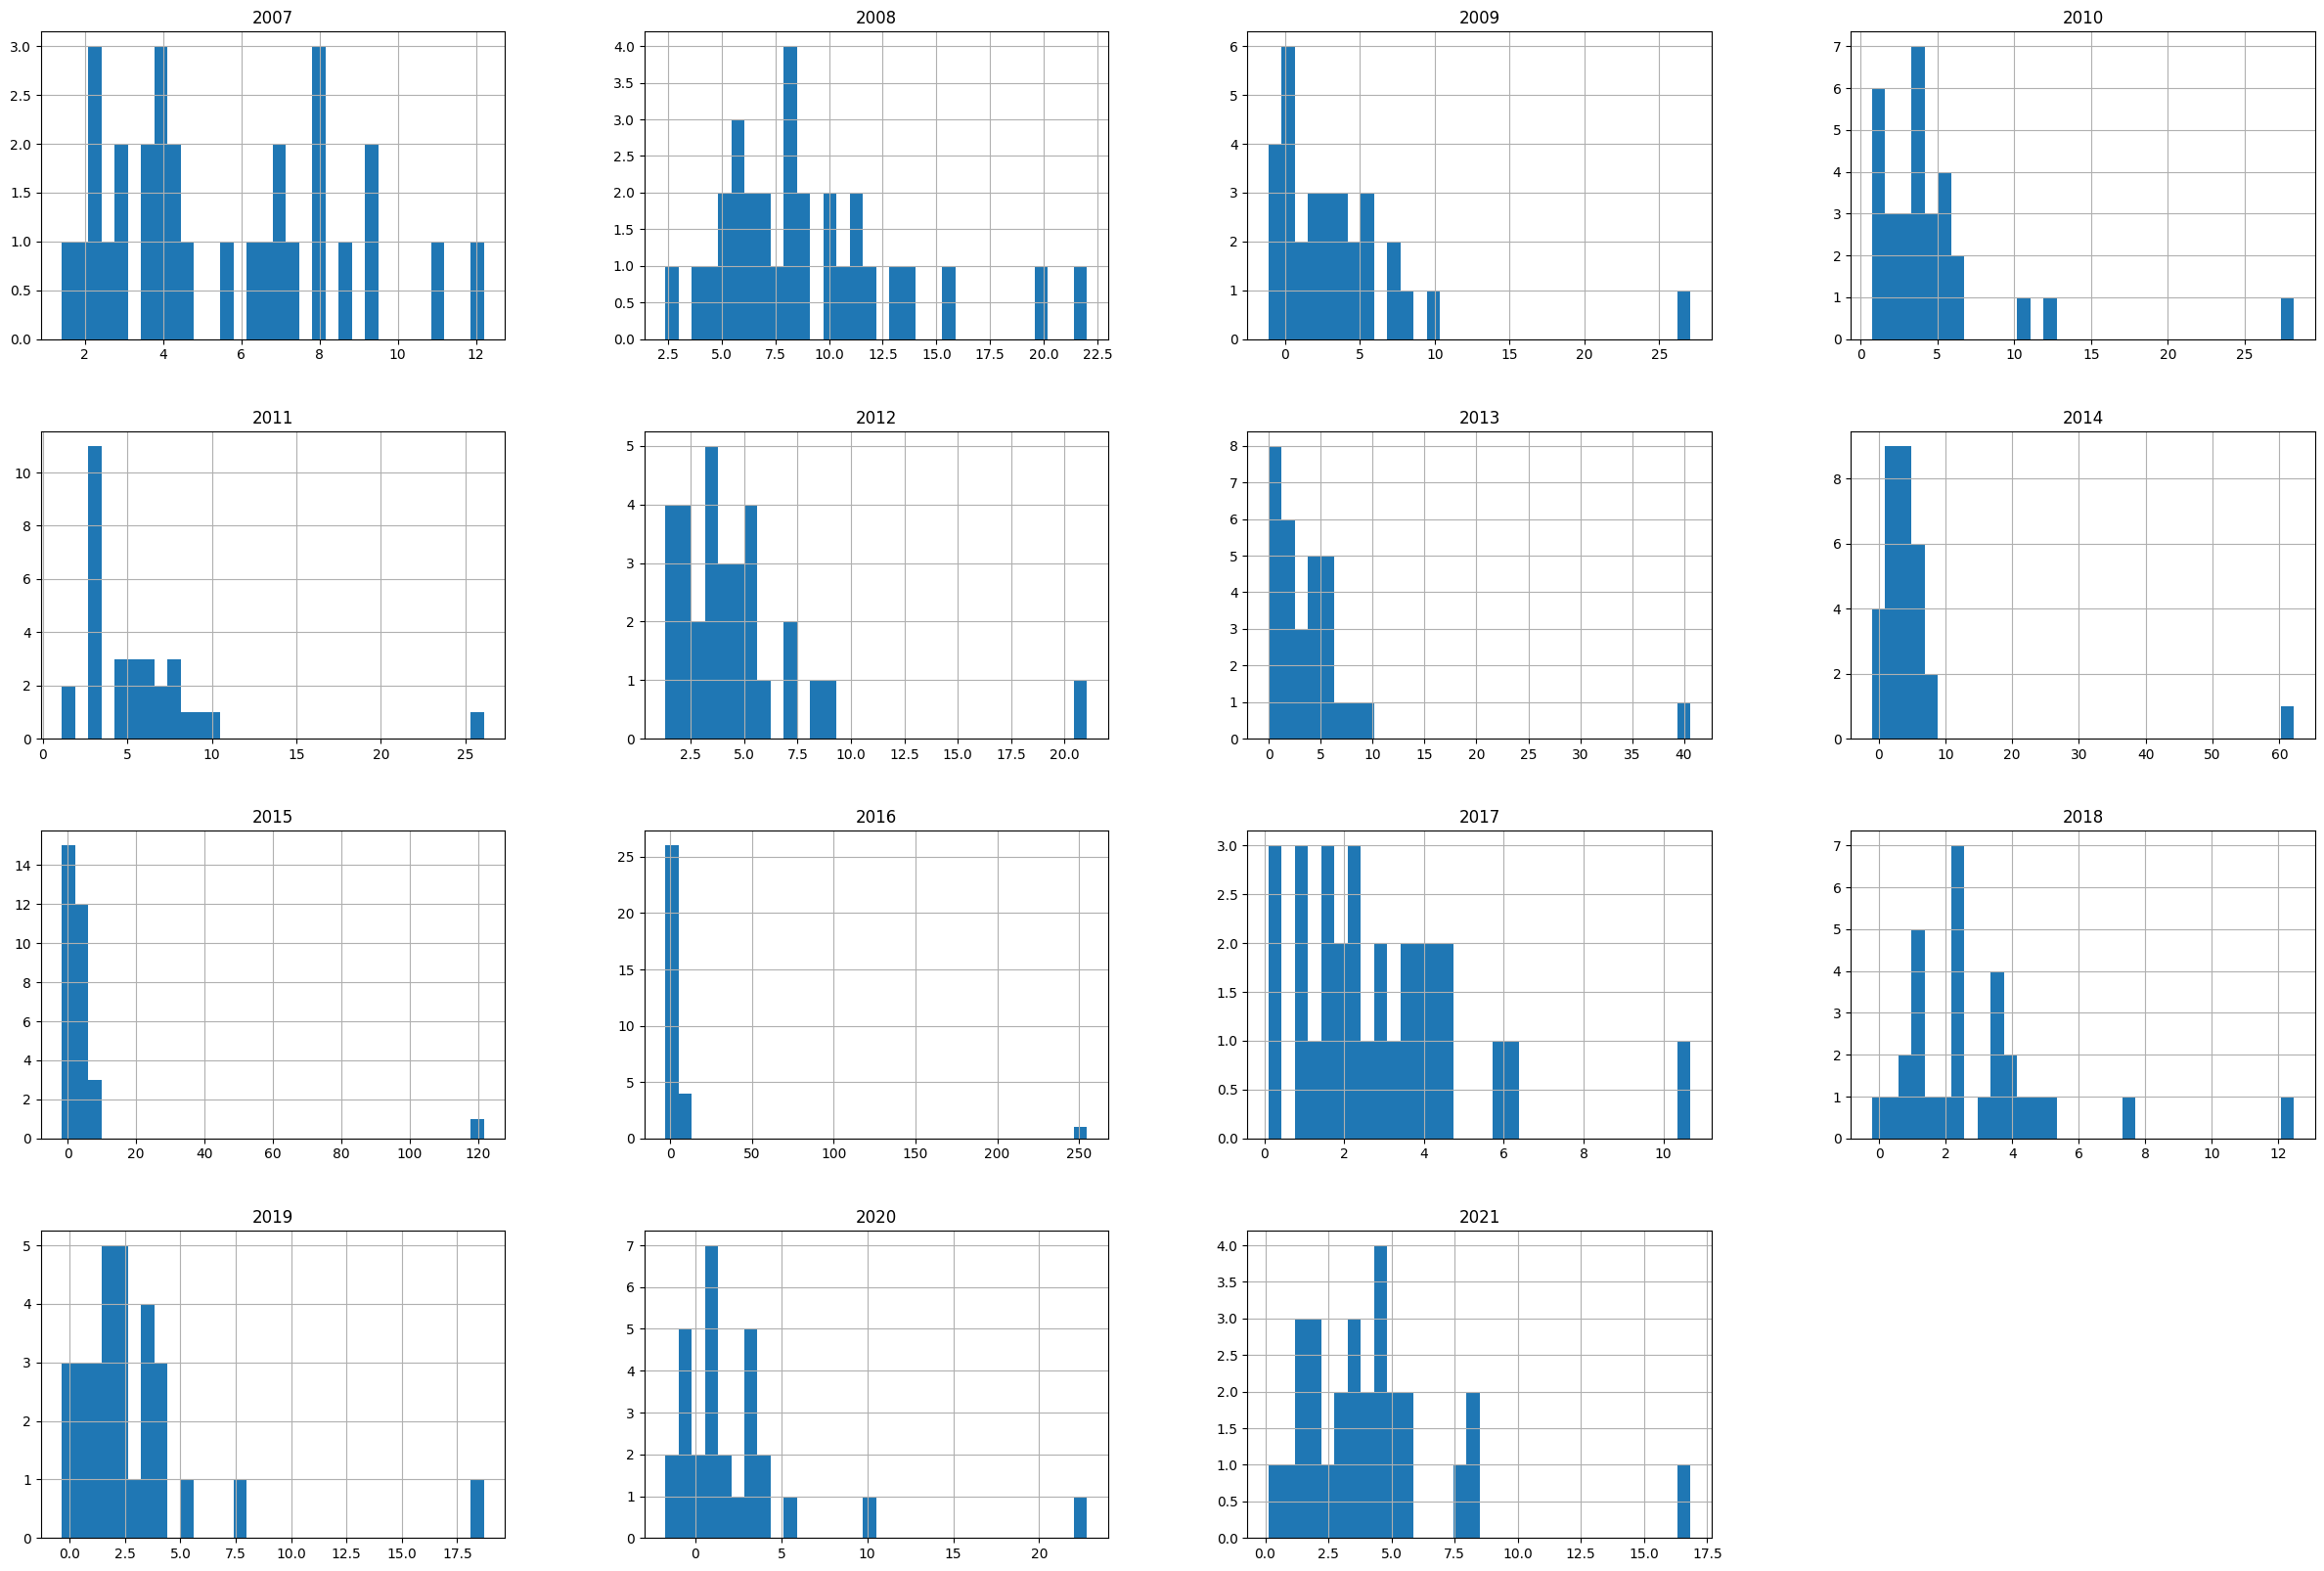

In [925]:
df_inflacion.hist(bins=32, figsize=(30,20))
plt.show()

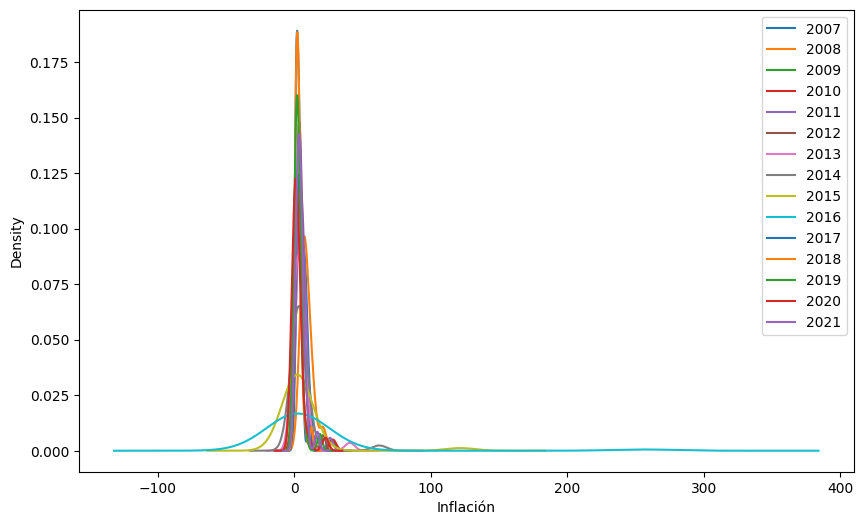

In [926]:


fig, ax = plt.subplots(figsize=(10,6))
df_inflacion.plot(kind='density', ax=ax)
ax.set_xlabel('Inflación')
plt.show()

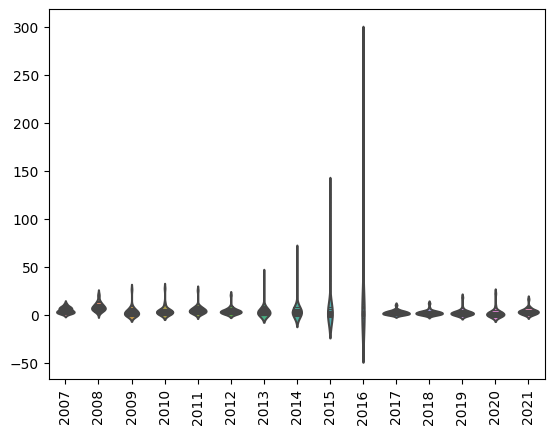

In [927]:
# Crear la gráfica de violín con los datos rotados del eje X
ax = sns.violinplot(data=df_inflacion.drop(columns='country'), inner='stick')
plt.xticks(rotation=90)
plt.show()

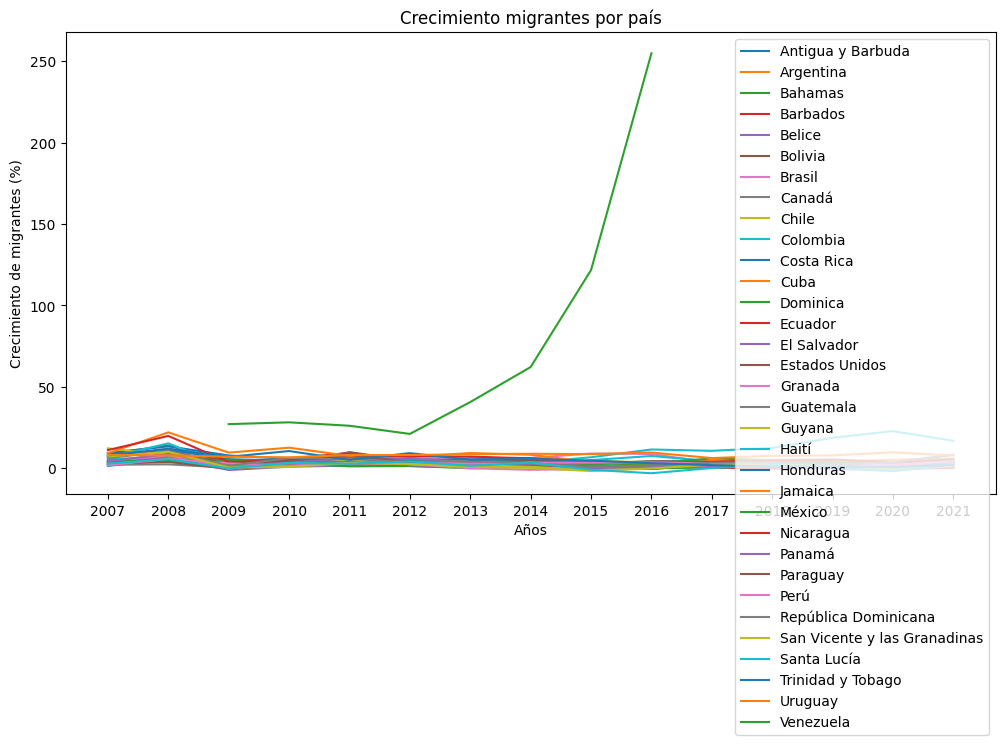

In [928]:
#diagrama de lineas 

fig, ax = plt.subplots(figsize=(12,6))

for country in df_inflacion['country']:
    ax.plot(df_inflacion.columns[1:], df_inflacion[df_inflacion['country'] == country].values[0][1:], label=country)

ax.legend()
ax.set_xlabel('Años')
ax.set_ylabel('Crecimiento de migrantes (%)')
ax.set_title('Crecimiento migrantes por país')
plt.show()

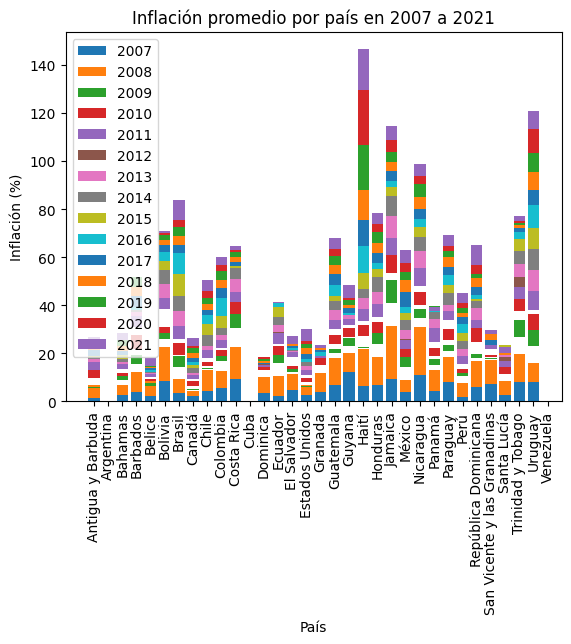

In [929]:
# diagrama de barras 


# calcular la inflación promedio de cada país en los años 2007 - 2021
inflacion_anual = df_inflacion[['country', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']].groupby('country').mean().reset_index()

# crear el gráfico de barras apiladas
fig, ax = plt.subplots()
ax.bar(inflacion_anual['country'], inflacion_anual['2007'], label='2007')
ax.bar(inflacion_anual['country'], inflacion_anual['2008'], bottom=inflacion_anual['2007'], label='2008')
ax.bar(inflacion_anual['country'], inflacion_anual['2009'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009'], label='2009')
ax.bar(inflacion_anual['country'], inflacion_anual['2010'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010'], label='2010')
ax.bar(inflacion_anual['country'], inflacion_anual['2011'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011'], label='2011')
ax.bar(inflacion_anual['country'], inflacion_anual['2012'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2011'], label='2012')
ax.bar(inflacion_anual['country'], inflacion_anual['2013'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012'], label='2013')
ax.bar(inflacion_anual['country'], inflacion_anual['2014'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013'], label='2014')
ax.bar(inflacion_anual['country'], inflacion_anual['2015'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014'], label='2015')
ax.bar(inflacion_anual['country'], inflacion_anual['2016'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015'], label='2016')
ax.bar(inflacion_anual['country'], inflacion_anual['2017'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015']+inflacion_anual['2016'], label='2017')
ax.bar(inflacion_anual['country'], inflacion_anual['2018'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015']+inflacion_anual['2016']+inflacion_anual['2017'], label='2018')
ax.bar(inflacion_anual['country'], inflacion_anual['2019'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015']+inflacion_anual['2016']+inflacion_anual['2017']+inflacion_anual['2018'], label='2019')
ax.bar(inflacion_anual['country'], inflacion_anual['2020'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015']+inflacion_anual['2016']+inflacion_anual['2017']+inflacion_anual['2018']+inflacion_anual['2019'], label='2020')
ax.bar(inflacion_anual['country'], inflacion_anual['2021'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015']+inflacion_anual['2016']+inflacion_anual['2017']+inflacion_anual['2018']+inflacion_anual['2019']+inflacion_anual['2020'], label='2021')


# personalizar el gráfico
ax.set_xlabel('País')
ax.set_ylabel('Inflación (%)')
ax.set_title('Inflación promedio por país en 2007 a 2021')
ax.legend()

ax.tick_params(axis='x', labelrotation=90)

# mostrar el gráfico
plt.show()

In [930]:
# analisis de outliers

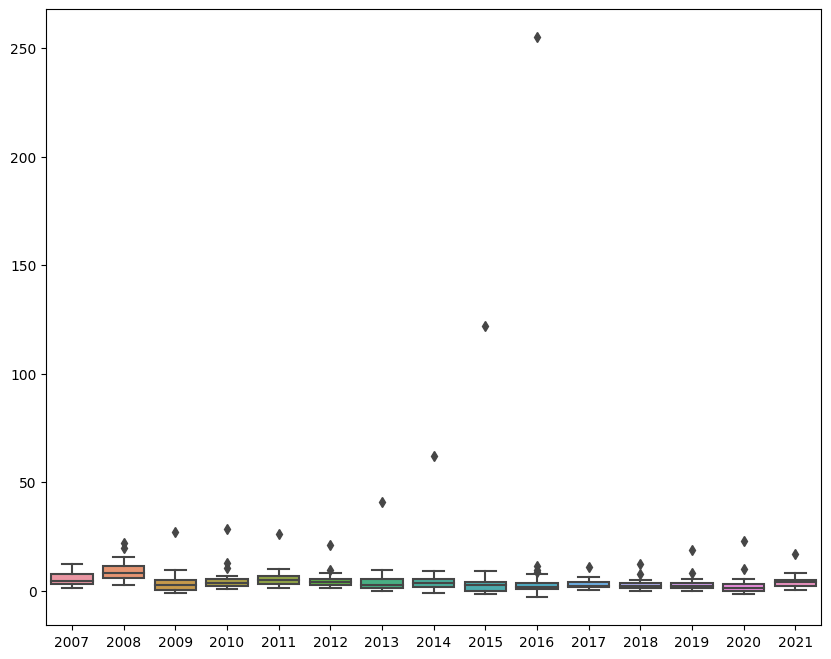

In [931]:
# Creamos un boxplot de Seaborn:

plt.figure(figsize=(10, 8))

sns.boxplot(data=df_inflacion.iloc[:,1:])

# Mostramos el gráfico:

plt.show()

In [932]:


# Definimos una función para encontrar outliers
def find_outliers(data):
    # Calculamos el rango intercuartílico
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculamos los límites del bigote
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Encontramos los outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # Devolvemos los outliers
    return outliers

# Buscamos los outliers en cada columna del DataFrame
for col in df_inflacion.columns[1:]:
    outliers = find_outliers(df_inflacion[col])
    print("Outliers en la columna", col, ":", outliers.values)

    

Outliers en la columna 2007 : []
Outliers en la columna 2008 : [22.0228385  19.82620313]
Outliers en la columna 2009 : [27.08094145]
Outliers en la columna 2010 : [12.610552   10.54920032 28.18746471]
Outliers en la columna 2011 : [26.09021232]
Outliers en la columna 2012 : [ 9.26028137 21.06899563]
Outliers en la columna 2013 : [40.63942752]
Outliers en la columna 2014 : [62.16864998]
Outliers en la columna 2015 : [121.7380853]
Outliers en la columna 2016 : [  8.73914352  11.50290739   9.63941348 254.94853478]
Outliers en la columna 2017 : [10.68008872]
Outliers en la columna 2018 : [12.48141112  7.6065336 ]
Outliers en la columna 2019 : [18.70378257  7.88198871]
Outliers en la columna 2020 : [22.79631136  9.75640636]
Outliers en la columna 2021 : [16.84152402]


In [933]:
def find_outliers(data):
    # Calculamos el rango intercuartílico
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculamos los límites del bigote
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Encontramos los outliers y sus índices correspondientes
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_indices = outliers.index
    
    # Devolvemos los outliers y sus índices correspondientes
    return outliers, outlier_indices

In [934]:
for col in df_inflacion.columns[1:]:
    outliers, outlier_indices = find_outliers(df_inflacion[col])
    print("Outliers en la columna", col)
    print("Valores:", outliers.values)
    print("Índices:", outlier_indices.values)
    print("Países:", df_inflacion.loc[outlier_indices]['country'].values)
    print("")

Outliers en la columna 2007
Valores: []
Índices: []
Países: []

Outliers en la columna 2008
Valores: [22.0228385  19.82620313]
Índices: [21 23]
Países: ['Jamaica' 'Nicaragua']

Outliers en la columna 2009
Valores: [27.08094145]
Índices: [32]
Países: ['Venezuela']

Outliers en la columna 2010
Valores: [12.610552   10.54920032 28.18746471]
Índices: [21 30 32]
Países: ['Jamaica' 'Trinidad y Tobago' 'Venezuela']

Outliers en la columna 2011
Valores: [26.09021232]
Índices: [32]
Países: ['Venezuela']

Outliers en la columna 2012
Valores: [ 9.26028137 21.06899563]
Índices: [30 32]
Países: ['Trinidad y Tobago' 'Venezuela']

Outliers en la columna 2013
Valores: [40.63942752]
Índices: [32]
Países: ['Venezuela']

Outliers en la columna 2014
Valores: [62.16864998]
Índices: [32]
Países: ['Venezuela']

Outliers en la columna 2015
Valores: [121.7380853]
Índices: [32]
Países: ['Venezuela']

Outliers en la columna 2016
Valores: [  8.73914352  11.50290739   9.63941348 254.94853478]
Índices: [ 6 19 31 32

In [935]:
# Comprender la causa de los outliers:



In [936]:
# matriz de correlacion 

In [937]:
#convertimos en datos numericos las columnas en string que vamos a necesitar.
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [938]:
#analizamos la correlacion entre las features (tabla matriz de correlacion)

df_inflacion_corr = df_inflacion.corr()

C:\Users\alekz\AppData\Local\Temp\ipykernel_13652\3807846814.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_inflacion_corr = df_inflacion.corr()


In [939]:
# visualizo
df_inflacion_corr

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2007,1.000000,0.738901,0.504077,0.499319,0.585390,0.455550,0.592128,0.450339,0.192342,0.240840,0.302694,0.323502,0.265521,0.255472,0.175324
2008,0.738901,1.000000,0.489136,0.639201,0.596970,0.583579,0.697090,0.533455,0.265684,0.234802,0.370138,0.368414,0.366354,0.383789,0.220319
2009,0.504077,0.489136,1.000000,0.925138,0.867143,0.922297,0.935497,0.912213,0.874161,0.854534,0.265948,0.177278,0.123582,0.139439,0.019038
2010,0.499319,0.639201,0.925138,1.000000,0.871869,0.938806,0.935872,0.906584,0.873074,0.861945,0.331646,0.288832,0.246977,0.300098,0.258067
2011,0.585390,0.596970,0.867143,0.871869,1.000000,0.892696,0.930295,0.906989,0.879757,0.871380,0.480742,0.447902,0.358985,0.377800,0.282544
2012,0.455550,0.583579,0.922297,0.938806,0.892696,1.000000,0.946066,0.914320,0.878158,0.855364,0.377943,0.361586,0.313159,0.336540,0.183644
2013,0.592128,0.697090,0.935497,0.935872,0.930295,0.946066,1.000000,0.982800,0.960178,0.947759,0.515404,0.504250,0.413676,0.467061,0.381447
2014,0.450339,0.533455,0.912213,0.906584,0.906989,0.914320,0.982800,1.000000,0.989610,0.981661,0.420451,0.434455,0.332776,0.374463,0.282948
2015,0.192342,0.265684,0.874161,0.873074,0.879757,0.878158,0.960178,0.989610,1.000000,0.996830,0.583554,0.564659,0.559238,0.602899,0.503994
2016,0.240840,0.234802,0.854534,0.861945,0.871380,0.855364,0.947759,0.981661,0.996830,1.000000,0.776483,0.737842,0.748340,0.776313,0.700374


<AxesSubplot: >

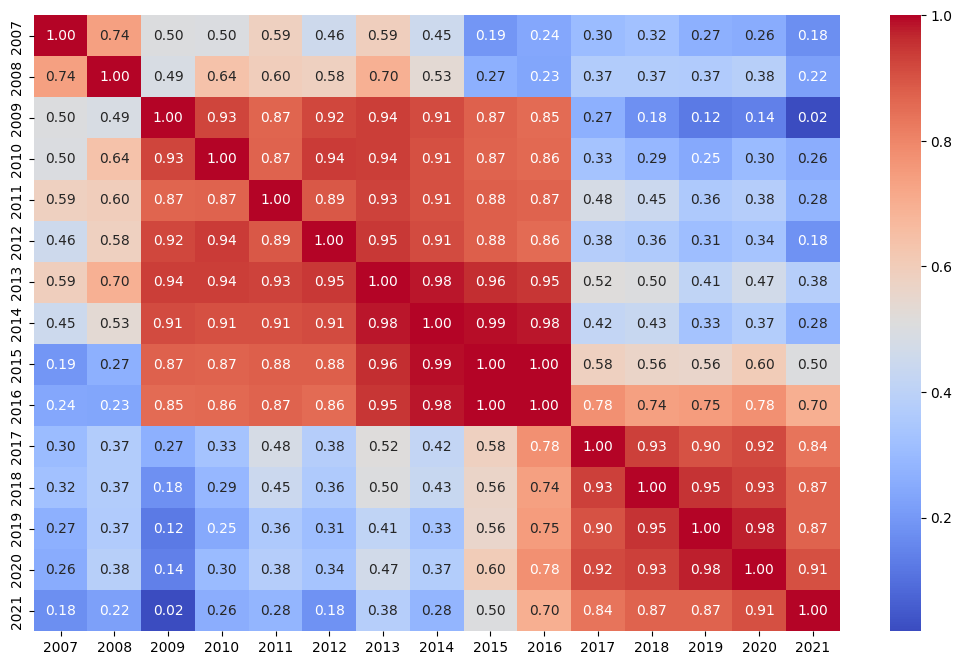

In [940]:
#Graficamos las correlaciones con un mapa de calor

plt.figure(figsize=(13,8))
sns.heatmap(df_inflacion_corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm') 

In [941]:
# Resumen de atributos numéricos para variables continuas
df_inflacion.describe()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,30.000000,30.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,30.000000,30.000000,30.000000,29.000000,28.000000
mean,5.479890,9.094782,3.567284,4.764687,5.727617,4.593854,4.462237,5.308251,6.088451,10.780821,2.894492,2.892099,2.891277,2.336477,4.275788
std,2.918803,4.457841,5.159382,5.079468,4.401964,3.631731,7.162038,10.809167,21.648917,45.423448,2.185710,2.459519,3.471099,4.594779,3.255037
min,1.416053,2.370271,-1.104310,0.747109,1.131231,1.300581,-0.046412,-0.983603,-1.733612,-3.078218,0.104262,-0.224103,-0.355084,-1.755808,0.133251
25%,3.047560,5.929387,0.373466,2.024437,3.269999,2.504611,1.262165,1.567990,-0.198410,0.701581,1.537876,1.226079,1.108246,0.038521,2.062054
50%,4.492943,8.105065,2.591947,3.554377,4.977736,3.781808,2.721776,3.418362,2.388720,1.728265,2.307603,2.298102,2.091639,0.993337,3.878054
75%,7.729828,11.177976,5.024002,5.246931,6.699365,5.148954,5.180858,5.356623,4.028495,3.704704,3.913439,3.720933,3.683978,3.214441,4.954524
max,12.200154,22.022838,27.080941,28.187465,26.090212,21.068996,40.639428,62.168650,121.738085,254.948535,10.680089,12.481411,18.703783,22.796311,16.841524
